4/25/19
Pandas on ccs and lima score report csv files
Main goal: combine the two csv files, with the rows (indices) being the ZMW hole numbers

Note: axis 1: horizontal; move across all columns
      axis 0: vertical; move across all rows
      
Recall: ccs parameter descriptions
RG Tag: read group id
np: number of passes
rq: predicted read quality
za: avg Z-score of all subreads successfully added


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
plt.close('all')
#if using remote system: files located at: 
# bam_table.csv: /tier2/deweylab/scratch/ipsc_pacbio/demultiplexing/
#                 demultiplexed_full_bams/baseline/absolute_ccs/2_B01/bam_table.csv
#
#score_report_span_0: /tier2/deweylab/scratch/ipsc_pacbio/demultiplexing/
#     demultiplexed_full_bams/baseline/absolute_ccs/2_B01/lima_baseline/
#     ref_span_0/score_report_span_0
#
#
df_ccs = pd.read_csv('/Users/catherineanderson/Documents/Research_Spring_2019/bam_table.csv')
df_ccs = df_ccs.set_index('ZMW hole number')
#dropping RG Tag because it's just an id
df_ccs = df_ccs.drop('RG Tag', axis=1)


df_lima = pd.read_csv('/Users/catherineanderson/Documents/Research_Spring_2019/score_report_span_0.csv')
df_lima = df_lima.set_index('ZMW hole number')



#df_ccs



In [3]:
#df_lima[['IdxsCombined a', 'IdxsCombined b']]
#df_lima


In [4]:
df_combo = pd.merge(df_ccs,df_lima, on="ZMW hole number")

In [5]:
#takes in a GroupBy's object
#returns the number of zmws correctly barcoded
def correct_count (gb):
    count_dict = {}
    for name, group in gb:
        count = 0
  #      print ("name:", name)
  #      print ("group:")
  #      print(group)
        for row_index, row_data in group.iterrows():
 #           print("row_index: ",row_index)
  #          print("row_data: ")
  #          print(row_data)
            first_id = row_data['IdxsCombinedA']
            second_id = row_data['IdxsCombinedB']
  #          print("first id:",first_id)
  #          print("second id:",second_id)
   #     print()
        
            if(first_id == 3):
                if(second_id == 0):
                    count += 1
            elif(first_id == 0):
                if(second_id == 3):
                    count += 1
        count_dict[name] = count
 #   print("count_dict: ",count_dict)
    return count_dict;
        
        


In [6]:
#takes in a GroupBy object 
#returns the (decimal) percent correctly barcoded
def percent_correct(gb):
    correct_count_dict = correct_count(gb)
    group_sizes_dict = gb.size()
    percent_correct_dict = {}
    for name, group in gb:
        percent_correct_dict[name] = correct_count_dict[name]/group_sizes_dict[name]
    return percent_correct_dict
    

Let's do CCS first. Parameters to consider: np (number of passes), rq (predicted read quality), za (avg z-score of zmw's successfully added subreads)

# NP

In [7]:
#need to separate out df_combo based on np; 
#if they have same np, they stay in same mini-dataframe
#print(df_combo.sort_values(by='np'))
#np_grouped = df_combo.groupby('np')
np_percent_correct_dict = percent_correct(df_combo.groupby('np'))
a = 1

In [8]:
np_df = pd.DataFrame.from_dict(np_percent_correct_dict, 'index',columns = ['Fraction correct'])

In [121]:
#np_df

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

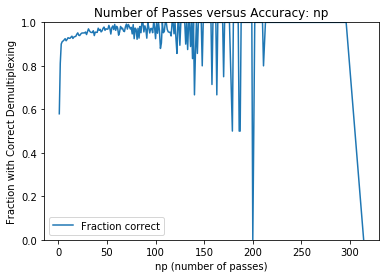

In [122]:
#now try a line plot
plt.figure();
np_ax2 = np_df.plot(title='Number of Passes versus Accuracy: np', use_index = True)
np_ax2.set_xlabel('np (number of passes)')
np_ax2.set_ylim(0, 1)
np_ax2.set_ylabel('Fraction with Correct Demultiplexing')

It looks like an attractive range of high accuracy exists somewhere within the domain between 200 and 330. 

It looks like the domain spanning np=[200,314] has a highly accurate range. HOWEVER we should compare this to a graph of number of zmws vs np value

In [123]:
np_zmw_count =df_combo.groupby('np').size()

In [124]:
np_zmw_df = pd.DataFrame.from_dict(np_zmw_count)


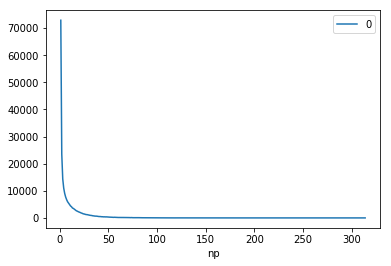

In [125]:
np_zmw_df.plot()

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

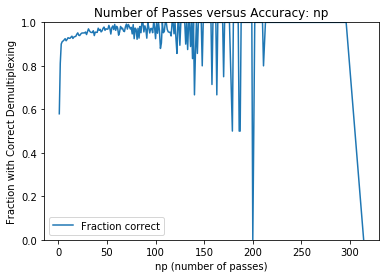

In [126]:
plt.figure();
np_ax2 = np_df.plot(title='Number of Passes versus Accuracy: np', use_index = True)
np_ax2.set_xlabel('np (number of passes)')
np_ax2.set_ylim(0, 1)
np_ax2.set_ylabel('Fraction with Correct Demultiplexing')

It looks like we should stick to the range of np = [0,50], since this is where most of the ZMWs reside. 

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

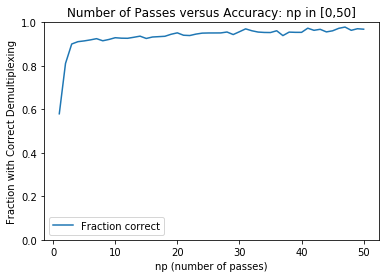

In [127]:
plt.figure();
np_ax2 = np_df.loc[0:50].plot(title='Number of Passes versus Accuracy: np in [0,50]', use_index = True)
np_ax2.set_xlabel('np (number of passes)')
np_ax2.set_ylim(0, 1)
np_ax2.set_ylabel('Fraction with Correct Demultiplexing')

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

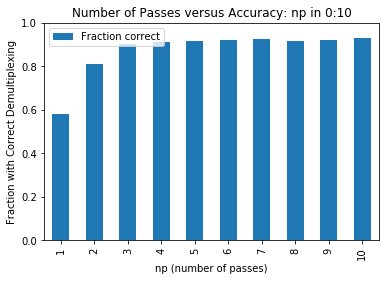

In [128]:
plt.figure();
np_ax2 = np_df.loc[0:10].plot(kind='bar',title='Number of Passes versus Accuracy: np in 0:10', use_index = True)
np_ax2.set_xlabel('np (number of passes)')
np_ax2.set_ylim(0, 1)
np_ax2.set_ylabel('Fraction with Correct Demultiplexing')

# NP Conclusion: 

Based on these graphs, it seems the best range of np values to use is either [2,50] or [3:50] inclusive, depending on what our specific accuracy threshold is. 

# RQ: Read Quality

First: check the distribution of ZMWs over read quality scores

In [129]:
rq_zmw_count =df_combo.groupby('rq').size()

In [130]:
rq_zmw_df = pd.DataFrame.from_dict(rq_zmw_count)

<Figure size 432x288 with 0 Axes>

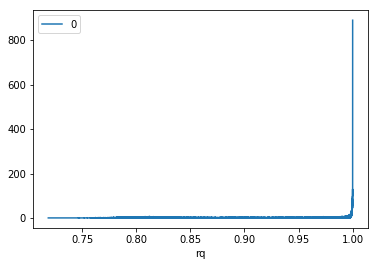

In [131]:
plt.figure()
ax = rq_zmw_df.plot()

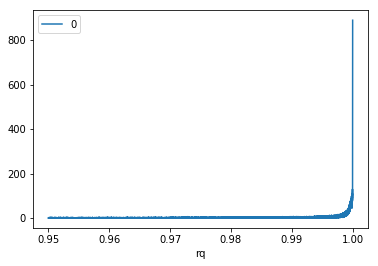

In [132]:
rq_zmw_df.loc[0.95:1].plot()

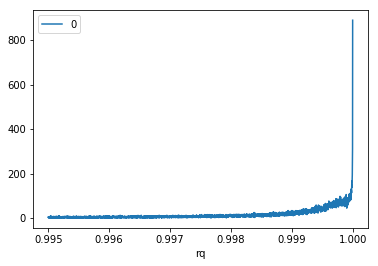

In [133]:
rq_zmw_df.loc[0.995:1].plot()

It looks like almost all ZMWs are clustered between 0.999 and 1.00 (which is great!)

In [134]:
#Separate out based on read quality
rq_percent_correct_dict = percent_correct(df_combo.groupby('rq'))
a = 1

In [135]:
rq_df = pd.DataFrame.from_dict(rq_percent_correct_dict, 'index',columns = ['Fraction correct'])

In [ ]:
#now try a line graph
plt.figure();
rq_ax = rq_df.plot(title='Predicted Read Quality versus Accuracy: rq')
rq_ax.set_xlabel('rq (Predicted Read Quality)')
rq_ax.set_ylim(0, 1)
rq_ax.set_ylabel('Fraction with Correct Demultiplexing')

graph above: Note that from .77 to .95, the visual is solid blue. this implies that there is much oscillation between high % correct and low. However, somewhere between 0.975 and 1, there is a curve back up to 100% correct. Let's explore that region. 

We already know that nearly all ZMWs are between rq= 0.999 and 1.0, so we might as well just analyze that area


In [ ]:
#line graph between 0.999 and 1.00
plt.figure();
rq_ax = rq_df.loc[0.999:1].plot(title='Predicted Read Quality versus Accuracy: rq in [0.999,1]')
rq_ax.set_xlabel('rq (Predicted Read Quality)')
rq_ax.set_ylim(0, 1)
rq_ax.set_ylabel('Fraction with Correct Demultiplexing')

In [ ]:
#zoom in
plt.figure();
rq_ax = rq_df.loc[0.999:1].plot(title='Predicted Read Quality versus Accuracy: rq in [0.999,1]')
rq_ax.set_xlabel('rq (Predicted Read Quality)')
rq_ax.set_ylim(0.65, 1)
rq_ax.set_ylabel('Fraction with Correct Demultiplexing')

In [ ]:
#zoom in
plt.figure();
rq_ax = rq_df.loc[0.999:0.99915].plot(title='Predicted Read Quality versus Accuracy: rq in [0.999,0.99915]')
rq_ax.set_xlabel('rq (Predicted Read Quality)')
rq_ax.set_ylim(0.65, 1)
rq_ax.set_ylabel('Fraction with Correct Demultiplexing')

After the dip between 0.99902 and 0.99904, all the ZMWs with an rq>=0.99904 have an accuracy >= 0.8; depending on our threshold for accuracy, we could keep much of this. 

If we want an accuracy greater than .90, we'll need to constrict the domain further: 

In [ ]:
#zoom in
plt.figure();
rq_ax = rq_df.loc[0.99912:0.99915].plot(kind = 'bar',title='Predicted Read Quality versus Accuracy: rq in [0.99912,0.99915]')
rq_ax.set_xlabel('rq (Predicted Read Quality)')
rq_ax.set_ylim(0.65, 1)
rq_ax.set_ylabel('Fraction with Correct Demultiplexing')

For an accuracy >= 0.90, rq must be >= 0.999138

# ZA 
(avg z-score of successfully added subreads)

First: distribution of zmws

In [9]:
#df_combo.sort_values(by='za')['za']
#za range: -43 to 43

In [8]:
za_zmw_count =df_combo.groupby('za').size()
za_zmw_df = pd.DataFrame.from_dict(za_zmw_count)

<Figure size 432x288 with 0 Axes>

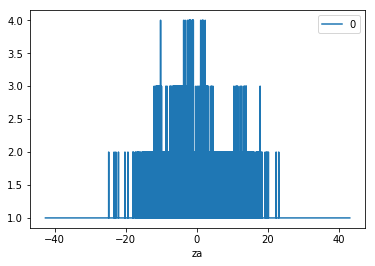

In [9]:
plt.figure()
ax = za_zmw_df.plot()

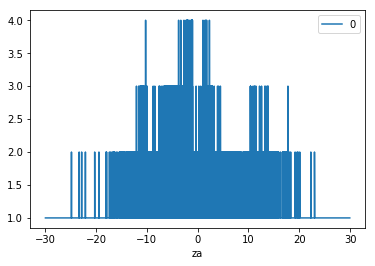

In [10]:
za_zmw_df.loc[-30:30].plot()

It appears most zmws are between a za of -25 and 25. We could focus on that region, but many just have two zmws in their za bin. We could restrict further, although the highest number is four. Let's look at three: 

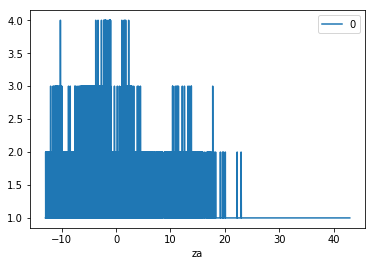

In [14]:
za_zmw_df.loc[-13:55].plot()

In [15]:
#separate based on za
za_percent_correct_dict = percent_correct(df_combo.groupby('za'))

In [16]:
za_df = pd.DataFrame.from_dict(za_percent_correct_dict, 'index',columns = ['Fraction correct'])

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

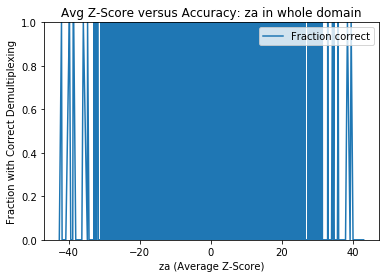

In [17]:
#look at accuracy: full view
plt.figure();
za_ax = za_df.plot(title='Avg Z-Score versus Accuracy: za in whole domain')
za_ax.set_xlabel('za (Average Z-Score)')
za_ax.set_ylim(0, 1)
#za_ax.set_xlim(-30,30)
za_ax.set_ylabel('Fraction with Correct Demultiplexing')

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

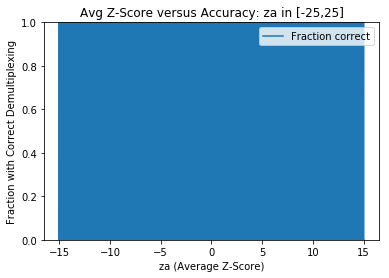

In [18]:
#zoom in
plt.figure();
za_ax = za_df.loc[-15:15].plot(title='Avg Z-Score versus Accuracy: za in [-15,15]')
za_ax.set_xlabel('za (Average Z-Score)')
za_ax.set_ylim(0, 1)
za_ax.set_ylabel('Fraction with Correct Demultiplexing')

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

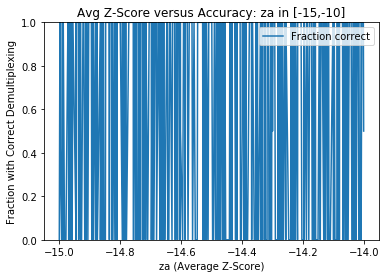

In [20]:
#zoom in
plt.figure();
za_ax = za_df.loc[-15:-14].plot(title='Avg Z-Score versus Accuracy: za in [-15,-10]')
za_ax.set_xlabel('za (Average Z-Score)')
za_ax.set_ylim(0, 1)
za_ax.set_ylabel('Fraction with Correct Demultiplexing')

# ZA Conclusion:
no clear relationship to accuracy; don't use this parameter to filter

# LIMA PARAMETERS

# ScoreLead
(how close first barcode call is to second. too low and get false positives)

In [23]:
score_lead_zmw_count =df_combo.groupby('ScoreLead').size()
score_lead_zmw_df = pd.DataFrame.from_dict(score_lead_zmw_count)

<Figure size 432x288 with 0 Axes>

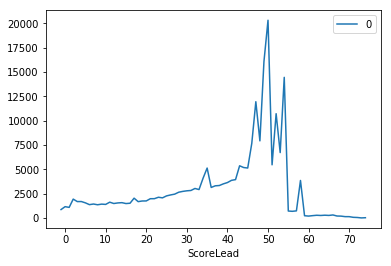

In [24]:
plt.figure()
ax = score_lead_zmw_df.plot()

Big drop off somewhere between 50 and 70. 

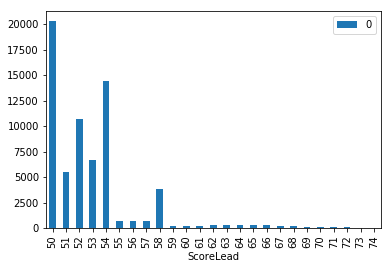

In [26]:
score_lead_zmw_df.loc[50:].plot(kind='bar')

Looks like nearly all zmws lie at ScoreLead <=58. However, the larger the ScoreLead, the lower the chance of false positives. It would be nice to keep as many high ScoreLead zmws as possible.

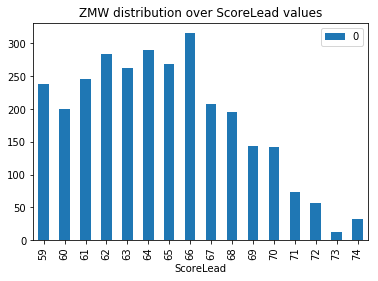

In [44]:
score_lead_zmw_df.loc[59:].plot(kind='bar', title='ZMW distribution over ScoreLead values')

Even the "dropoff" in the quantity of ZMWs in each bin still has a sizable amount, so we probably don't need to exclude ScoreLead values based strictly off of ZMW distribution. 

In [29]:
score_lead_percent_correct_dict = percent_correct(df_combo.groupby('ScoreLead'))

In [30]:
score_lead_df = pd.DataFrame.from_dict(score_lead_percent_correct_dict, 'index',columns = ['Fraction correct'])

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

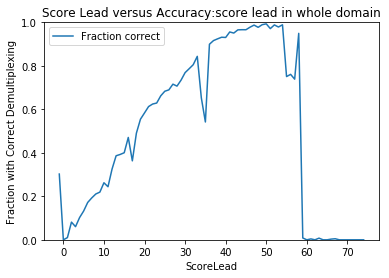

In [35]:
#look at accuracy: full view
plt.figure();
score_lead_ax = score_lead_df.plot(title='Score Lead versus Accuracy:score lead in whole domain')
score_lead_ax.set_xlabel('ScoreLead')
score_lead_ax.set_ylim(0, 1)
#za_ax.set_xlim(-30,30)
score_lead_ax.set_ylabel('Fraction with Correct Demultiplexing')

In [36]:
#df_combo.sort_values(by='ScoreLead')['ScoreLead']
#Range: -1 to 74

A dropoff in accuracy happens in the same general area as the dropoff in amount of ZMWs in each ScoreLead bin; somewhere between ScoreLead of 50 and 60

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

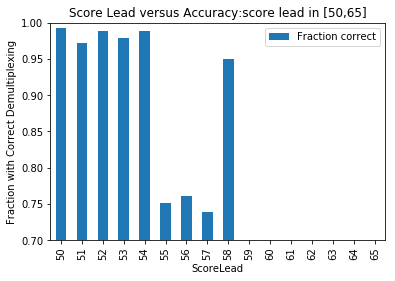

In [43]:
#zoom in to find max ScoreLead
plt.figure();
score_lead_ax = score_lead_df.loc[50:65].plot(kind = 'bar',title='Score Lead versus Accuracy:score lead in [50,65]')
score_lead_ax.set_xlabel('ScoreLead')
score_lead_ax.set_ylim(0.7, 1)
#za_ax.set_xlim(-30,30)
score_lead_ax.set_ylabel('Fraction with Correct Demultiplexing')

In ZMW distribution AND accuracy plot: first minor dropoff at ScoreLead = 54, second larger at ScoreLead = 58

For Accuracy >=.9, we should stick to:

Max ScoreLead <=54

Min: ScoreLead somewhere between 30 and 45


Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

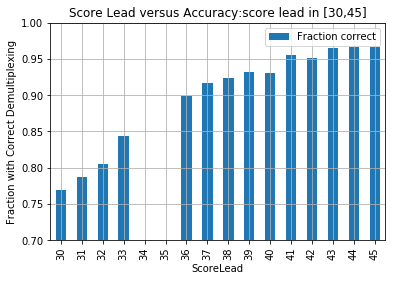

In [42]:
#zoom in to find min ScoreLead
plt.figure();
score_lead_ax = score_lead_df.loc[30:45].plot(kind = 'bar', grid = True, title='Score Lead versus Accuracy:score lead in [30,45]')
score_lead_ax.set_xlabel('ScoreLead')
score_lead_ax.set_ylim(0.7, 1)
#za_ax.set_xlim(-30,30)
score_lead_ax.set_ylabel('Fraction with Correct Demultiplexing')

For accuracy >= .9, want min ScoreLead >=36

# ScoreLead Conclusion:
For accuracy >= 0.9, want ScoreLead in [36,54]

# PassedFilters
(1 if passed Lima filters, 0 if not)

In [45]:
passed_filters_zmw_count =df_combo.groupby('PassedFilters').size()
passed_filters_zmw_df = pd.DataFrame.from_dict(passed_filters_zmw_count)

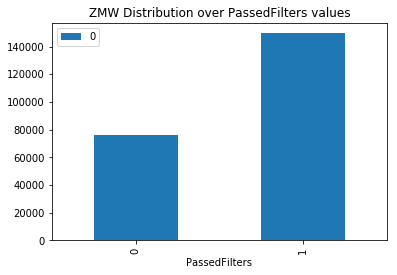

In [48]:
passed_filters_zmw_df.plot(kind = 'bar',title="ZMW Distribution over PassedFilters values")

In [49]:
passed_filters_percent_correct_dict = percent_correct(df_combo.groupby('PassedFilters'))

In [50]:
passed_filters_df = pd.DataFrame.from_dict(passed_filters_percent_correct_dict,
                                           'index',columns = ['Fraction correct'])

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

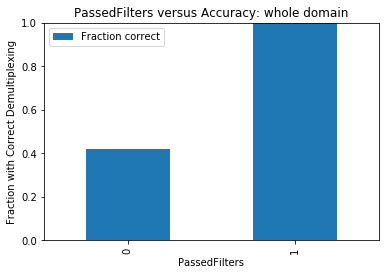

In [53]:
#look at accuracy: full view
plt.figure();
ax = passed_filters_df.plot(kind = 'bar',title='PassedFilters versus Accuracy: whole domain')
ax.set_xlabel('PassedFilters')
ax.set_ylim(0, 1)
#za_ax.set_xlim(-30,30)
ax.set_ylabel('Fraction with Correct Demultiplexing')

# PassedFilters Conclusion:
Only keep those that have PassedFilters=1 (ie those that pass Lima Filters)

# NumBarcodedRegions
(number of barcode regions identified in read)

In [55]:
numBarcoded_zmw_count =df_combo.groupby('NumBarcodedRegions').size()
numBarcoded_zmw_df = pd.DataFrame.from_dict(numBarcoded_zmw_count)

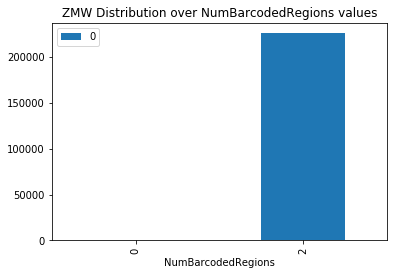

In [57]:
numBarcoded_zmw_df.plot(kind = 'bar',title="ZMW Distribution over NumBarcodedRegions values")

In [58]:
numBarcoded_zmw_count

NumBarcodedRegions
0        31
2    225506
dtype: int64

Most reads have two barcoded regions (good; 5' and 3'). Some have zero, which we obviously don't want. 

In [59]:
numBarcoded_percent_correct_dict = percent_correct(df_combo.groupby('NumBarcodedRegions'))

In [61]:
numBarcoded_df = pd.DataFrame.from_dict(numBarcoded_percent_correct_dict,
                                           'index',columns = ['Fraction correct'])

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

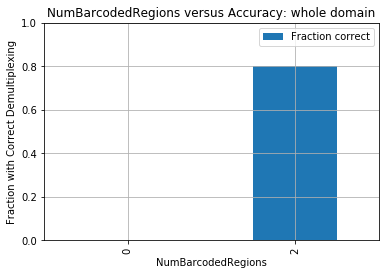

In [63]:
#look at accuracy: full view
plt.figure();
ax = numBarcoded_df.plot(kind = 'bar',grid = True,title='NumBarcodedRegions versus Accuracy: whole domain')
ax.set_xlabel('NumBarcodedRegions')
ax.set_ylim(0, 1)
#za_ax.set_xlim(-30,30)
ax.set_ylabel('Fraction with Correct Demultiplexing')

# NumBarcodedRegions Conclusions:
Want this equal to 2.

# NumBarcodedRegionsPassed
(of barcode regions identified in read, how many passed relevant filters? Intuition would say we want 2 to pass)

In [64]:
barPass_zmw_count =df_combo.groupby('NumBarcodedRegionsPassed').size()
barPass_zmw_df = pd.DataFrame.from_dict(barPass_zmw_count)

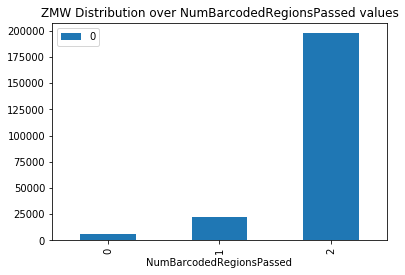

In [65]:
barPass_zmw_df.plot(kind = 'bar',title="ZMW Distribution over NumBarcodedRegionsPassed values")

In [66]:
barPass_percent_correct_dict = percent_correct(df_combo.groupby('NumBarcodedRegionsPassed'))

In [67]:
barPass_df = pd.DataFrame.from_dict(barPass_percent_correct_dict,
                                           'index',columns = ['Fraction correct'])

Text(0,0.5,'Fraction with Correct Demultiplexing')

<Figure size 432x288 with 0 Axes>

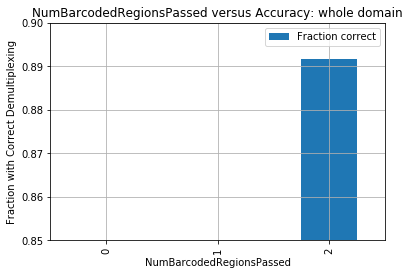

In [71]:
#look at accuracy: full view
plt.figure();
ax = barPass_df.plot(kind = 'bar',grid = True,title='NumBarcodedRegionsPassed versus Accuracy: whole domain')
ax.set_xlabel('NumBarcodedRegionsPassed')
ax.set_ylim(0.85, .9)
#za_ax.set_xlim(-30,30)
ax.set_ylabel('Fraction with Correct Demultiplexing')

In [72]:
barPass_df

,Fraction correct
0,0.072875
1,0.215190
2,0.891649


# NumBarcodedRegionsPassed Conclusion
want equal to 2

# SignalIncrease
(not sure. Reflection of degree of noise? Like the lower it is, the noisier the signal when sequencing?)